In [1]:
# Load Data

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 랜덤을 부여하지 않고 잘라낸 경우
- Shuffle 수행을 하지 않음

In [2]:
test_size = 50

X_test = X[: test_size]
y_test = y[: test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
X_train = X[test_size: ]
y_train = y[test_size: ]

print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred)
                            
print("예측 스코어 : {:.4f}".format(acc_result))
# 예측 스코어 : 0.0000
# 따라서 데이터를 섞어주는 Shrffle 과정이 꼭 필요하다.

예측 스코어 : 0.0000


## train_test_split 활용


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 121
)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

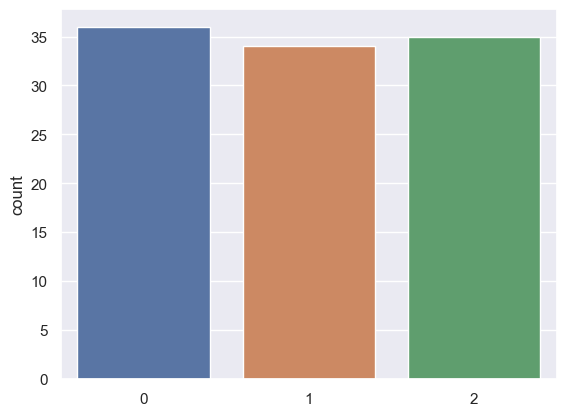

In [8]:
# 시각화를 통한 train 세트의 비율 확인  
sns.countplot(x=y_train)
plt.show()

# 원본은 50 : 50 : 50 이었지만 불균형 하다.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 121, 
    stratify = y # 클래스의 비율 만큼 분할이 수행
)

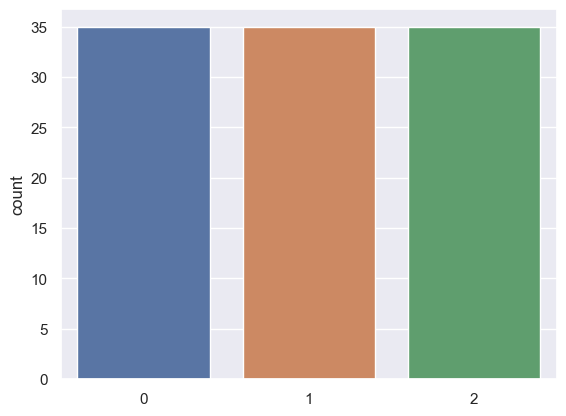

In [10]:
sns.countplot(x=y_train)
plt.show()
# stratify 를 활용하면 균형해진다.

## K-Fold, Stratified K-Fold

In [11]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

In [12]:
# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print("훈련 세트의 인덱스 : {}".format(train_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 

## 교차 검증 수행
- 각 폴드 마다 훈련 세트를 위한 인덱스를 활용해 훈련 데이터로 사용
- 검증 세트를 위한 인덱스를 활용해 검증 데이터로 사용
- 각 훈련, 검증의 결과를 저장했다가, 최종적으로 훈련이 끝나면 평균

In [13]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

kfold = KFold(n_splits=3)
for train_indices, valid_indices in kfold.split(X):
  
  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clt = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성 동시에 훈련

  # 예측
  pred = dt_clt.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

# 평균
print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))


# KFold시 훈련과 검증 세트의 클래스 비율 때문에 결과가 0 이 나온다.

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [14]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [15]:
# Stratified K Fold 교차 검증
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):
  
  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clt = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성 동시에 훈련

  # 예측
  pred = dt_clt.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

# 평균
print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9200
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.96


- 회귀 모델의 경우 : KFold 사용해서 교차검증
- 분류 모델의 경우 : Strartified KFold 사용해서 교차검증

## cross_val_score

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier 가 들어가면 자동으로 Stratified K Fold를 사용
    X,
    y,
    scoring='accuracy',
    cv = 3 # fold 개수    
)
print("폴드 별 정확도 확인 : {}".format(scores))
print("평균 별 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인 : [0.98 0.94 1.  ]
평균 별 정확도 확인 : 0.9733333333333333


## GridSearchCV를 이용한 하이퍼 파라미터 튜닝 & 교차검증

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 121
)

In [18]:
# GridSearch 를 수행할 하이퍼 파라미터를 딕셔너리로 설정

# key :  하이퍼 파라미터의 이름(변수명)
# value : 하이퍼 파라미터에 들어갈 값의 목록(리스트)

parameters = {
    "max_depth" : [1, 2, 3],
    "min_samples_split" : [2, 3]
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid = parameters,
    return_train_score = True, # 훈련 세트에 대한 평가 점수도 같이 받게 해주는 옵션
    n_jobs = -1, # 사용 가능한 CPU 코어를 모두 사용해서 훈련에 투입
    cv = 3 # 각 하이퍼 파라미터 조합으로 만드는 모델에서 사용할 폴드의 개수
)

In [20]:
grid_dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [21]:
# GridSearchCV의 결과는 cv_results_ 변수에 들어있다.
grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00233992, 0.00248726, 0.00167966, 0.00217748, 0.00267482,
        0.00218153]),
 'std_fit_time': array([0.00024401, 0.0003951 , 0.0004498 , 0.00102692, 0.00045351,
        0.00025279]),
 'mean_score_time': array([0.00133236, 0.00100056, 0.00079894, 0.00133697, 0.00050012,
        0.00099802]),
 'std_score_time': array([4.69803687e-04, 3.46231793e-06, 5.88207289e-04, 4.74634540e-04,
        4.04763615e-04, 6.74349576e-07]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [22]:
print("GridSearchCV 최적 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dt_clf.best_score_)) # valid 세트에서의 최고 정확도

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9333


In [23]:
# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667


In [24]:
# 학습이 완료된 최고 성능의 모델 객체 얻어내기
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [25]:
pred = best_dt_clf.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667
